In [ ]:
CONFIG = {
  'mode': 'Binary',
  'model': 'resnet101',
  'epochs': 10,
  'batch_size': 32,
  'seed': 777,
  'save_dir': 'results/resnet101',
  'weights': 'results/resnet101/best_model_v1.pt',
}

In [ ]:
from Models import ResNet50, ResNet101, ResNet50_MCDropout
from CustomDataset import CustomImageDataset
from utils.Plots import plot_confusion, plot_roc, reliability_diagram, expected_calibration_error, brier_score, entropy_hist


In [ ]:
# Quick dataset sanity check (uses CustomDataset defaults)
try:
    ds_train = CustomImageDataset(mode=CONFIG.get('mode', 'Binary'), build_div='train')
    ds_val   = CustomImageDataset(mode=CONFIG.get('mode', 'Binary'), build_div='val')
    ds_test  = CustomImageDataset(mode=CONFIG.get('mode', 'Binary'), build_div='test')
    print('Train:', len(ds_train), 'Val:', len(ds_val), 'Test:', len(ds_test))
except Exception as e:
    print('Dataset check skipped:', e)

Drive already mounted at <PATH> to attempt to forcibly remount, call drive.mount("<PATH> force_remount=True).


Processing .<PATH>
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=9989d55a2305bc52e738bc5cc949861d27dee88d5f2ec779f116ede6ff7f0c2e
  Stored in directory: <PATH>
Successfully built grad-cam
  Attempting uninstall: grad-cam
    Found existing installation: grad-cam 1.5.5
    Uninstalling grad-cam-1.5.5:
      Successfully uninstalled grad-cam-1.5.5


cuda


ResNet101(
  (relu): ReLU()
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2_x): Sequential(
    (0): ResBottleNeck(
      (relu): ReLU()
      (inner_conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (inner_bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (inner_conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (inner_bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (inner_conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (inner_bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (skip_connection): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm

Currently you're at your 1th attempt. Proceed? [y<PATH>


Epoch 0: 100%|██████████| 34<PATH> [00:15<00:00,  2.26it<PATH> Batch Loss=0.6176, Train Acc=0.5574]
Validating Epoch 0: 100%|██████████| 4<PATH> [00:00<00:00, 24.41it<PATH> Batch Loss=1.0931, Val Acc=0.5500]
Epoch 1: 100%|██████████| 34<PATH> [00:14<00:00,  2.34it<PATH> Batch Loss=0.7302, Train Acc=0.6111]
Validating Epoch 1: 100%|██████████| 4<PATH> [00:00<00:00, 24.17it<PATH> Batch Loss=0.8388, Val Acc=0.5500]
Epoch 2: 100%|██████████| 34<PATH> [00:14<00:00,  2.41it<PATH> Batch Loss=0.6153, Train Acc=0.6259]
Validating Epoch 2: 100%|██████████| 4<PATH> [00:00<00:00, 25.58it<PATH> Batch Loss=0.7100, Val Acc=0.6333]
Epoch 3: 100%|██████████| 34<PATH> [00:13<00:00,  2.43it<PATH> Batch Loss=0.5385, Train Acc=0.6306]
Validating Epoch 3: 100%|██████████| 4<PATH> [00:00<00:00, 24.76it<PATH> Batch Loss=0.6635, Val Acc=0.6500]
Epoch 4: 100%|██████████| 34<PATH> [00:13<00:00,  2.46it<PATH> Batch Loss=0.6167, Train Acc=0.6713]
Validating Epoch 4: 100%|██████████| 4<PATH> [00:00<00:00, 24.41it<P

ResNet101(
  (relu): ReLU()
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2_x): Sequential(
    (0): ResBottleNeck(
      (relu): ReLU()
      (inner_conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (inner_bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (inner_conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (inner_bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (inner_conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (inner_bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (skip_connection): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm

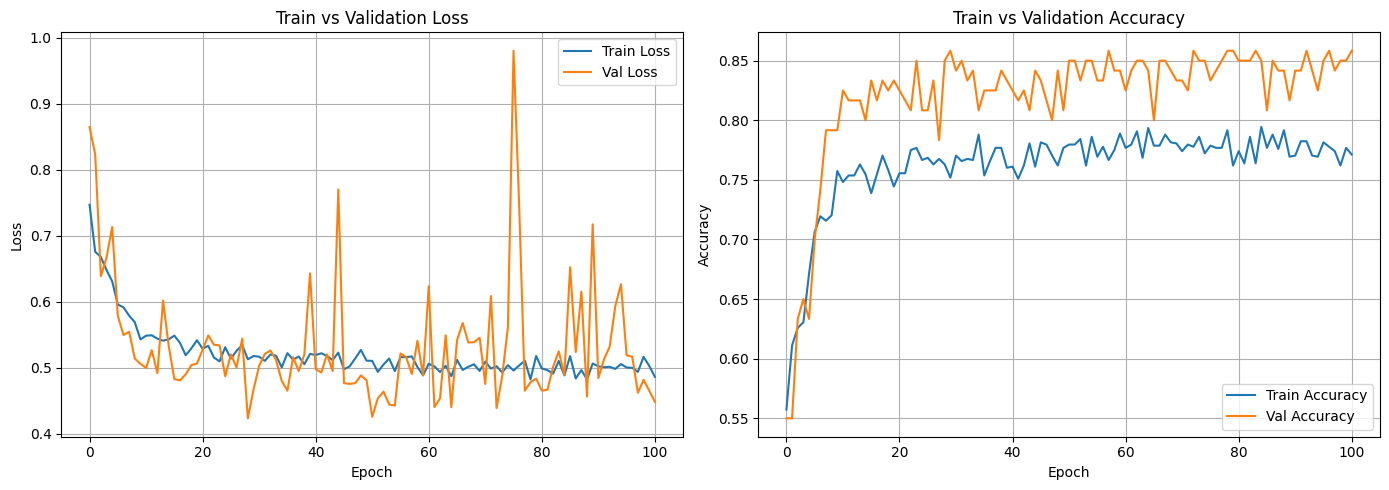

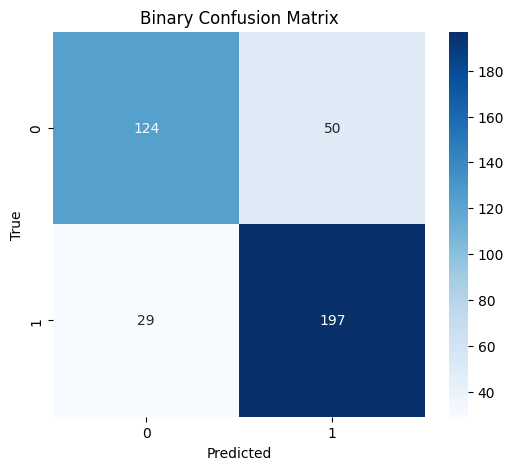

Accuracy: 80.25%


In [ ]:
# Training 
%run -m train --mode Binary --model resnet101 --epochs 100 --batch-size 32 --seed 777 --save-dir results/resnet101

# Evaluation
%run -m evaluate --mode Binary --model resnet50 --batch-size 32 --weights results/resnet101/best_model_v1.pt

In [ ]:
# Evaluation (uses your evaluate.py). Uncomment and adjust weights path if needed.
# %run -m evaluate --mode Binary --model resnet101 --batch-size 32 --weights results/resnet101/best_model_v1.pt
